R1=10000.000000Ω,C1=94.351187nF,R2=1258.897971Ω,C2=11.992383nF
f1=149.581713Hz,f2=1188.826188Hz,f3=11888.261880Hz,ft=3759.398496Hz,f_3dB=5000.000000Hz


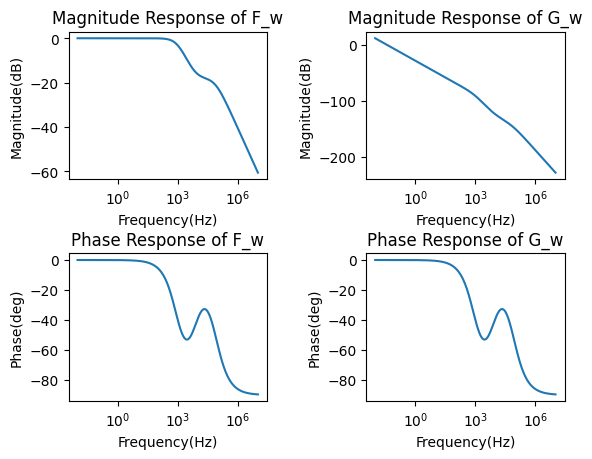

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi, sqrt

# 对于我的GPSDO设定参数如下：
f_pfd = 100e3  # pfd 频率
w_pfd = 2 * pi * f_pfd
w_3dB = w_pfd * 0.05  # 推荐值
N = 100  # 分频数
K_0 = 10  # VCO的增益 Hz/V
K_d = 5 / (4 * pi)  # PFD的增益 V/Hz

R1 = 10e3  # R1设定值


w_t = w_3dB / 1.33
w1 = K_0 * K_d / N * w_t  # 推荐值，需小于该值
w3 = w_t * sqrt(10)
w2 = w_t / sqrt(10)

T1 = 1 / w1
T2 = 1 / w2
T3 = 1 / w3

t1 = T1 + T3 - T2
t2 = T2 - (T1 * T3 / (t1))
t3 = T2 - t2

C1 = t1 / R1
R2 = t2 / C1
C2 = t3 / R2

print("R1=%fΩ,C1=%fnF,R2=%fΩ,C2=%fnF" % (R1, C1 * 1e9, R2, C2 * 1e9))
print(
    "f1=%fHz,f2=%fHz,f3=%fHz,ft=%fHz,f_3dB=%fHz"
    % (w1 / 2 / pi, w2 / 2 / pi, w3 / 2 / pi, w_t / 2 / pi, w_3dB / 2 / pi)
)


w_list = np.logspace(np.log10(0.01), np.log10(10e6), 1000)
F_w = (
    (1 + 1j * w_list * T2)
    / ((1 + 1j * w_list * T1) * (1 + 1j * w_list * T3))
)
F_w_abs = np.abs(F_w)
F_w_log = 20 * np.log10(F_w_abs)
F_w_angle = np.angle(F_w) * 180 / pi
plt.subplot(2, 2, 1)
plt.plot(w_list, F_w_log)
plt.xscale("log")
plt.xlabel("Frequency(Hz)")
plt.ylabel("Magnitude(dB)")
plt.title("Magnitude Response of F_w")
plt.subplot(2, 2, 3)
plt.plot(w_list, F_w_angle)
plt.xscale("log")
plt.xlabel("Frequency(Hz)")
plt.ylabel("Phase(deg)")
plt.title("Phase Response of F_w")

G_w = (
    K_0
    * K_d
    / N
    * (1 + 1j * w_list * T2)
    / (w_list * (1 + 1j * w_list * T1) * (1 + 1j * w_list * T3))
)
G_w_abs = np.abs(G_w)
G_w_log = 20 * np.log10(G_w_abs)
G_w_angle = np.angle(G_w) * 180 / pi
plt.subplot(2, 2, 2)
plt.plot(w_list, G_w_log)
plt.xscale("log")
plt.xlabel("Frequency(Hz)")
plt.ylabel("Magnitude(dB)")
plt.title("Magnitude Response of G_w")
plt.subplot(2, 2, 4)

plt.plot(w_list, G_w_angle)
plt.xscale("log")
plt.xlabel("Frequency(Hz)")
plt.ylabel("Phase(deg)")
plt.title("Phase Response of G_w")
plt.subplots_adjust(
    left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.5
)
plt.show()